# An Analysis of China's One Child Policy (1979 to 2016)

## Context: 

The One Child Policy was a policy that mandated one child per family in China. This policy was China's answer to alleviating the social, economic and environmental problems associated with the country's rapidly growing population. The policy was implemented in 1979 and ended in 2016. There have been minor adjustments to the policy between 1979 and 2016, such as the change in 2013 that allowed parents who were of single child families to have two children, that may or may not affect the outcome of the analysis. 

![title](https://i.ytimg.com/vi/0nq5ERo6blU/maxresdefault.jpg)

## Data:

The data used in this analysis is divided into four column categories:

Column Meta-Data:

1. Year
2. Population Annual % Growth 
3. Avg Real GDP per capita
4. Female Population (% of total population)

## Hypothesis: China's one child policy had an effect on the population growth rate in China between 1979 and 2016.

Group A: China's population growth rate before the policy (1960 - 1978)

Group B: China's population growth rate after introducing the policy (1979 - 2016)

Other factors of interest: policy's affect on Gross Domestic Product per Capita (GDP), Gender Equity (Female % of total population), carrying capacity

## Sources:

1. https://data.worldbank.org/indicator/SP.POP.GROW?end=2016&start=1960&view=chart (Population Growth)
2. https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS (Female % of total population)
3. http://www.populstat.info/Asia/chinac.htm (China population 1941 to 1959)
4. https://ourworldindata.org/economic-growth (Average Real GDP per capita, 2011 benchmark)

![title](https://limacharlienews.com/wp-content/uploads/2018/02/China-facing-consequences-of-the-one-child-policy.png)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
from scipy.stats import ttest_ind
import operator
import analysis_data1
%matplotlib inline
plt.style.use('seaborn')
sns.set_style('white')

In [33]:
# normalize data to prepare for any significant difference between datasets
def normalize_data(df):
    x = (df-df.min())/(df.max()-df.min())
    return x
df_a = analysis_data1.china_grp_a
df_b = analysis_data1.china_grp_b

col_title = ["Population Annual % Growth","Avg Real GDP per capita","Female Population (% of total population)"]
norm_dfa = pd.DataFrame(columns = col_title)
norm_dfb = pd.DataFrame(columns = col_title)

for col in col_title:
    norm_dfa[col] = normalize_data(df_a[col])
    norm_dfb[col] = normalize_data(df_b[col])

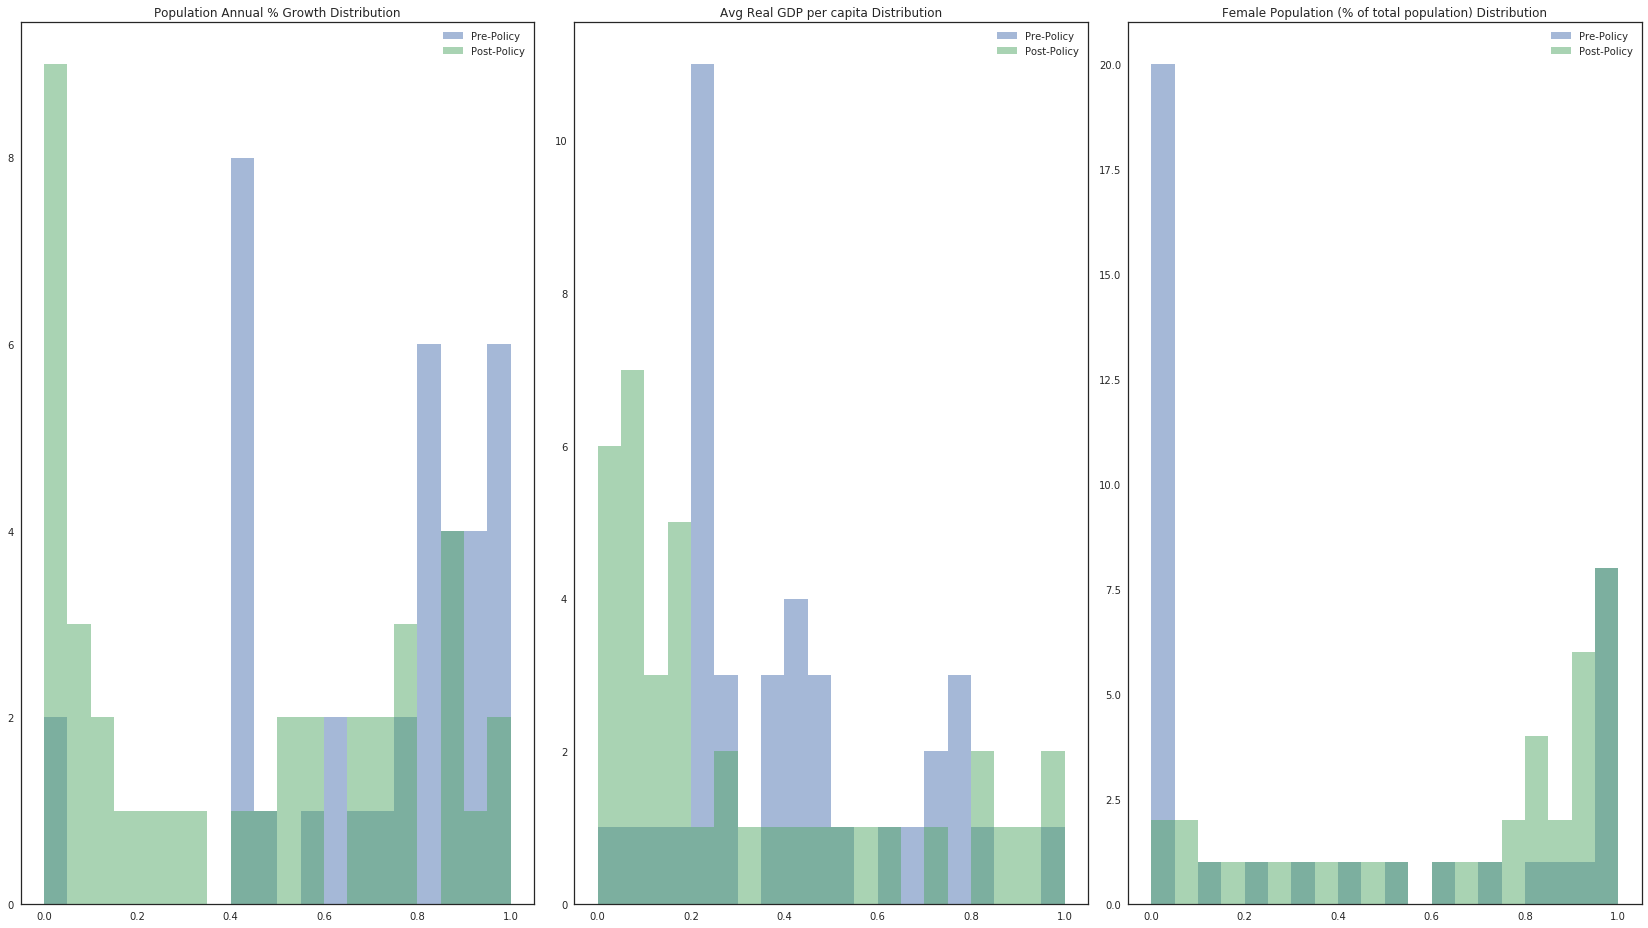

In [34]:
plt.rcParams['figure.figsize'] = (23,13)
fig,ax = plt.subplots(nrows = 1, ncols = 3)
y = 0
num = 0
for col in col_title:
    ax[y].hist(norm_dfa[col],bins=20,alpha=0.5,label="Pre-Policy")
    ax[y].hist(norm_dfb[col],bins=20,alpha=0.5,label="Post-Policy")
    ax[y].set_title(col + " Distribution")
    ax[y].legend(loc=0)
    y += 1
fig.tight_layout()
plt.show()

The histogram shows that there exists a wide variance in data between the pre and post one child policy datasets. Both datasets show some skew in data distribution which suggests that the data is not normally distributed. The data would need to be transformed to a normal distribution if we wanted to make predictions in our analysis model using statistical tools, but since the aim is to just analyze the given data, a transformation will not be needed. There appears to be some overlap between the two datasets, but it's not significant since it's apparent that the datasets are more different than alike. 

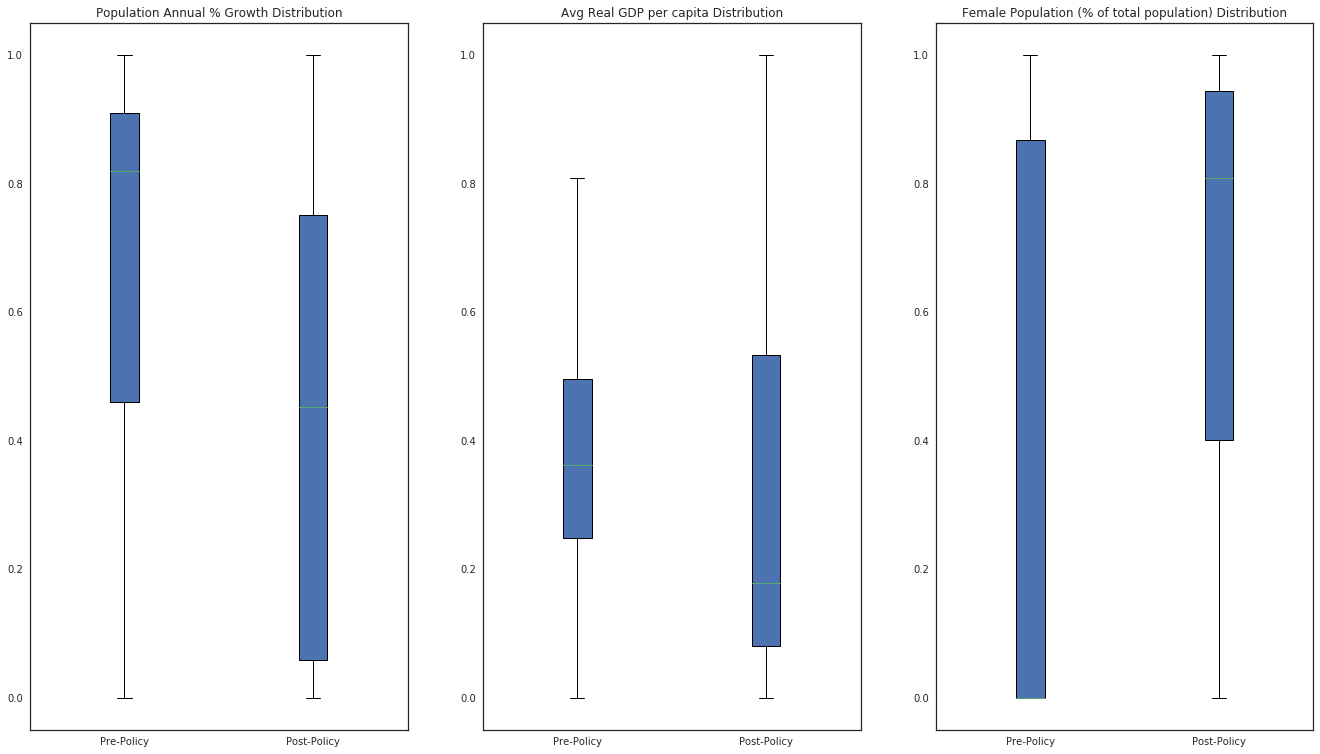

In [35]:
# checking for significant outliers & data distribution
fig,ax = plt.subplots(ncols = 3)
pop_data = [norm_dfa[col_title[0]],norm_dfb[col_title[0]]]
gdp_data = [norm_dfa[col_title[1]],norm_dfb[col_title[1]]]
fem_data = [norm_dfa[col_title[2]],norm_dfb[col_title[2]]]
data_list = [pop_data,gdp_data,fem_data]
y = 0
for col,data in zip(col_title,data_list):
    ax[y].boxplot(data,patch_artist=True,)
    ax[y].set_xticklabels(["Pre-Policy","Post-Policy"])
    ax[y].set_title(col + " Distribution")
    y+=1
plt.show()

The boxplots further confirm the variance in distribution between data in the two datasets observed. The means between pre and post policy datasets are significantly different across all categories, and it can be inferred that the standard deviation will be similarly different between datasets. This shows that the t-test will most likely show a statistically significant difference between the two datasets, but that remains to be seen after the t-test is performed later on in the analysis. The boxplots also show that there appear to be some outliers in the datasets, but there appears to be little to no significant outliers that may affect the results of the analysis.

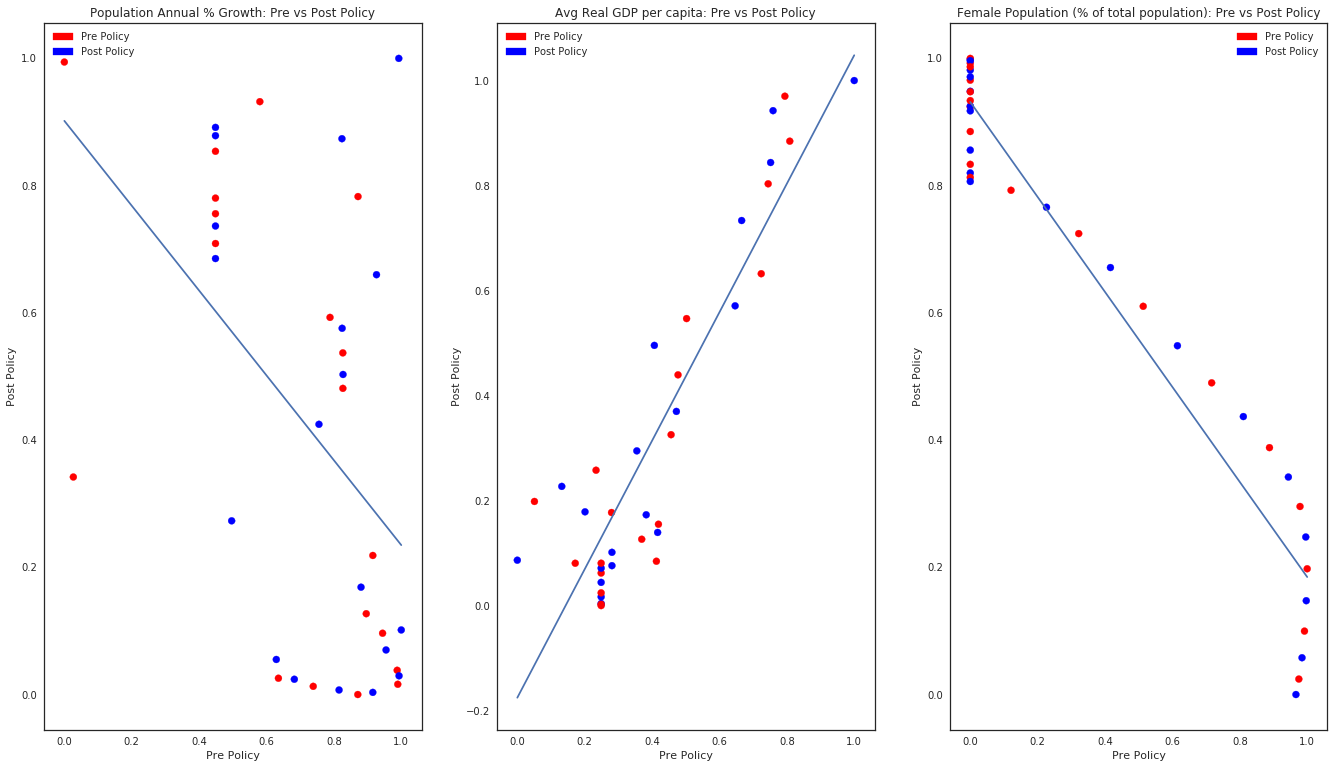

In [36]:
# checking for possible correlations in population growth rate, GDP, and female population between pre & post policy data
fig,ax = plt.subplots(ncols = 3)

y = 0
for col,data in zip(col_title,data_list):
    ax[y].scatter(data[0],data[1],c=("red","blue"))
    ax[y].plot(np.unique(data[0]), np.poly1d(np.polyfit(data[0],data[1], 1))(np.unique(data[0])))
    
    ax[y].set_title(col + ": Pre vs Post Policy")
    ax[y].set_xlabel("Pre Policy")
    ax[y].set_ylabel("Post Policy")
    red_dot = mpatches.Patch(color='red', label='Pre Policy')
    blue_dot = mpatches.Patch(color='blue', label='Post Policy')
    ax[y].legend(handles=[red_dot,blue_dot])
    y+=1

plt.show()

#question : should we compare pre vs. post policy in this situation? Or pick one group and compare it another (i.e. population growth vs GDP & Female Population)?

The scatterplots show how strongly correlated the pre and post policy datasets are to each other. The plot for population growth suggests that there is a negative correlation between the datasets. This could mean that as the policy was implemented the population growth decreased. The same could be inferred from the female population plot, the policy had a negative impact on China's female population. The plot on average real GDP per capita appears to show that the one child policy had a positive impact on China's real GDP per capita because there's a positive correlation between the two datasets. 

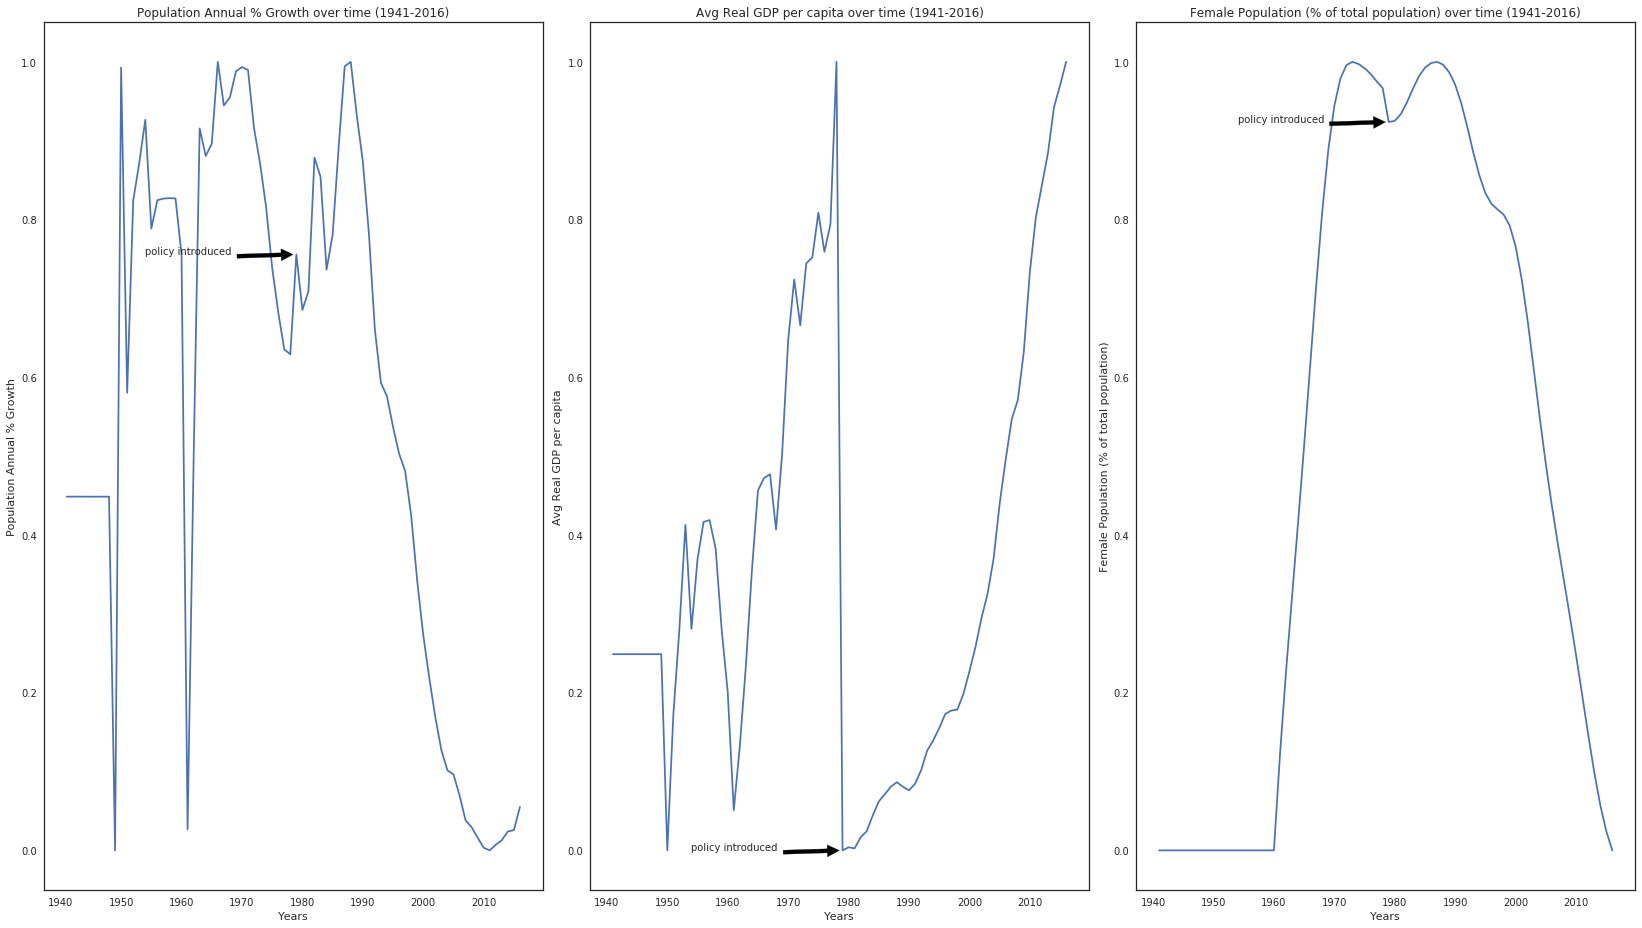

In [37]:
# display changes in population growth, real gdp per capita, and female population over time
fig,ax = plt.subplots(ncols = 3)
comb_pop = pop_data[0].append(pop_data[1])
comb_gdp = gdp_data[0].append(gdp_data[1])
comb_fem = fem_data[0].append(fem_data[1])
comb_list = [comb_pop,comb_gdp,comb_fem]
years = list(range(1941,2017))
y = 0

for col,data in zip(col_title,comb_list):
    ax[y].plot(years,data)
    ax[y].set_title(col + " over time (1941-2016)")
    ax[y].set_xlabel("Years")
    ax[y].set_ylabel(col)
    for i,j in zip(years,data):
        if i == 1979:
            ax[y].annotate('policy introduced', xy=(i, j),xytext=(i-25,j),arrowprops=dict(facecolor='black', shrink=0.05))
    y+=1
fig.tight_layout()
plt.show()

The analysis is probably better tailored for line plots since the difference between datasets can be clearly outlined over time. The one child policy was implemented and enforced starting in 1979 and lasted until the beginning of 2016. The population growth and female population graphs show that both data categories dramatically decrease shortly after the policy was introduced in 1979. The real GDP per capita graph shows the opposite effect, real GDP per capita increases after the policy was introduced in 1979.

## Analyzing data with two sample t-test

In this analysis, we are attempting to reject the hypothesis that the one child policy had no affect on the population growth in China. We will need to perform a two sample t-test to confirm whether or not our hypothesis is true.

In [38]:
# displaying mean and standard deviation for pre-policy dataset
df_a.describe()

,Population Annual % Growth,Avg Real GDP per capita,Female Population (% of total population)
count,38.000000,38.000000,38.000000
mean,1.657001,1092.486842,48.537637
std,1.003774,193.926793,0.100031
min,-1.119744,757.000000,48.455259
25%,0.679893,962.500000,48.455259
50%,2.082711,1056.000000,48.455259
75%,2.438360,1166.750000,48.657243
max,2.787332,1583.000000,48.687778


In [39]:
# displaying mean and standard deviation for post-policy dataset
df_b.describe()

,Population Annual % Growth,Avg Real GDP per capita,Female Population (% of total population)
count,38.000000,38.000000,38.000000
mean,0.963001,5080.105263,48.621898
std,0.401192,3391.079871,0.073787
min,0.479150,1648.000000,48.473819
25%,0.545702,2509.250000,48.562710
50%,0.991500,3547.000000,48.653602
75%,1.328463,7345.750000,48.683447
max,1.610071,12320.000000,48.695860


In [53]:
# two-sample ttest
p_value = []
t_value = []

for data in data_list:
    tval,pval = ttest_ind(data[1],data[0],equal_var=False)
    p_value.append(pval)
    t_value.append(tval)

# question: how to determine when equal_var is True or False? (Welch's t-test == two-sample ttest?)

In [55]:
ttest = pd.DataFrame(columns=["T-Value","P-Value"])
ttest["T-Value"] = t_value
ttest["P-Value"] = p_value
ttest["Study Title (Pre vs Post Policy)"] = col_title
display(ttest)

,T-Value,P-Value,Study Title (Pre vs Post Policy)
0,-3.980891,0.000171,Population Annual % Growth
1,-1.319372,0.191462,Avg Real GDP per capita
2,3.545037,0.000707,Female Population (% of total population)


### A) China's population growth, confirming the hypothesis

The t-test on the two datasets reveals a statistically significant difference between China's population growth before and after the implementation of the one child policy. The p-value for China's population growth is significantly less than the p-value analysis significance level of 0.05 (0.000171 < 0.05). This means that the corresponding t-value represents a real difference between pre and post policy population growths in China. In other words, the t-value and p-value confirms that the hypothesis is correct, the one child policy had an effect on the population growth in China. By looking at the graph results above, it can be reasonably deduced that the policy had a negative impact on population growth (population growth decreased). 

### B) Real GDP per capita, other factor of interest

The t-test tells a different story about the one child policy's affect on China's real GDP per capita compared to what is revealed in the graph visuals. While the graphs show a dramatic increase in real GDP per capita after the introduction of the policy, the p-value is far greater than the analysis significance level (0.191462 > 0.05), suggesting that difference in real GDP per capita, before and after the policy, is probably not directly affected by the one child policy. This is understandable since there are many factors that contribute to real GDP per capita (education, resources, other policies, etc.). Therefore, the one-child policy could have had some affect on the real GDP per capita in China, but it's not statistically significant. However, it's still a striking coincidence that the real GDP per capita increased around the same time the policy was introduced looking at the real GDP per capita over time. 

### C) Female Population (% of total population), other factor of interest

The t-test reveals a very interesting relationship between the one child policy and gender equity in China. China has been well-known to favoring male births over female births due to cultural practices and beliefs. The analysis aimed to illuminate the possible negative impact the one child policy could have had on gender equity in China given China's traditions and cultural practices. The p-value was signficantly less than the analysis significance level (0.000707 < 0.05) and therefore the t-value represents a statistically significant difference in China's female population before and after the introduction of the one child policy. The graphs further confirm that the one child policy had a negative impact on the female population in China. According to numerous articles and research studies, the reason behind the gender imbalance was primarily the result of families wanting male children, and since the law prevented them from having more than one, many potential mothers opted for abortions if they suspected they were going to have a daughter (ultrasounds, clinical tests, etc). Now there is a dramatic difference between male and female populations in China, and men are having a harder time finding female partners (more competition). 

## Conclusion

This analysis has provided evidence to support the hypothesis that the one child policy had an impact on China's population growth rate. The graphs show a clear difference between China's population growth rate before and after the one child policy was enforced, and the t-test further concludes that the difference is statistically significant by rejecting the possibility that there is no difference between the pre and post policy population growth rates. 

The exact nature of how the one child policy has specifically impacted the population growth rate in China, among other factors such as real GDP per capita and the gender gap, is left to the reader to infer. However, based on the evidence presented, the reader can reasonably conclude that the population growth rate and the female population as a percentage of the total population in China were negatively impacted by the one child policy. On the other hand, the evidence does not suggest a statistically significant correlation between the one child policy and the real GDP per capita in China. It could be implied that as the population growth rate decreases, the population in China becomes less saturated and therefore more resources can be reallocated to the remaining members of the population. But that lies just beyond the scope of this analysis, and a definitive conclusion cannot be made using only the evidence presented.  